In [143]:
import pandas as pd
import geopandas as gpd
import numpy as np
import plotly.express as px
import json

In [144]:
train = pd.read_csv('../data/train.csv', index_col='Id')
test = pd.read_csv('../data/test.csv', index_col='Id')

In [145]:
# X_train is the training features data
X_train = train.drop(['SalePrice'], axis=1)
# y is the target variable [SalePrice]
y = pd.DataFrame(train['SalePrice'])

# X is the combination of the features data from 'train' and 'test'. This is where we'll deal with the NaV values.
X = pd.concat([X_train, test], axis=0)

In [146]:
neighborhoods = pd.read_csv("neighborhoods.csv", index_col='Neighborhood')

In [147]:
neighborhoods

,Name,x,y
Neighborhood,,,
Blmngtn,Bloomington Heights,-93.635236,42.056419
Blueste,Bluestem,-93.631913,42.030781
BrDale,Briardale,-93.628824,42.052797
BrkSide,Brookside,-93.630386,42.028653
ClearCr,Clear Creek,-93.649135,41.993310
CollgCr,College Creek,-93.649654,42.021424
Crawfor,Crawford,-93.607140,42.028025
Edwards,Edwards,-93.685400,42.015511
Gilbert,Gilbert,-93.612019,42.033656


In [148]:
nbrhd_points = gpd.GeoDataFrame(neighborhoods)
nbrhd_points['geometry'] = gpd.points_from_xy(neighborhoods['x'], neighborhoods['y'])
nbrhd_points.set_geometry('geometry', inplace=True)
nbrhd_points.set_crs('EPSG:4326', inplace=True)

C:\Users\Ziad\AppData\Local\Temp\ipykernel_13960\4138056000.py:2: FutureWarning:

You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.



,Name,x,y,geometry
Neighborhood,,,,
Blmngtn,Bloomington Heights,-93.635236,42.056419,POINT (-93.63524 42.05642)
Blueste,Bluestem,-93.631913,42.030781,POINT (-93.63191 42.03078)
BrDale,Briardale,-93.628824,42.052797,POINT (-93.62882 42.05280)
BrkSide,Brookside,-93.630386,42.028653,POINT (-93.63039 42.02865)
ClearCr,Clear Creek,-93.649135,41.993310,POINT (-93.64913 41.99331)
CollgCr,College Creek,-93.649654,42.021424,POINT (-93.64965 42.02142)
Crawfor,Crawford,-93.607140,42.028025,POINT (-93.60714 42.02802)
Edwards,Edwards,-93.685400,42.015511,POINT (-93.68540 42.01551)
Gilbert,Gilbert,-93.612019,42.033656,POINT (-93.61202 42.03366)


<Axes: >

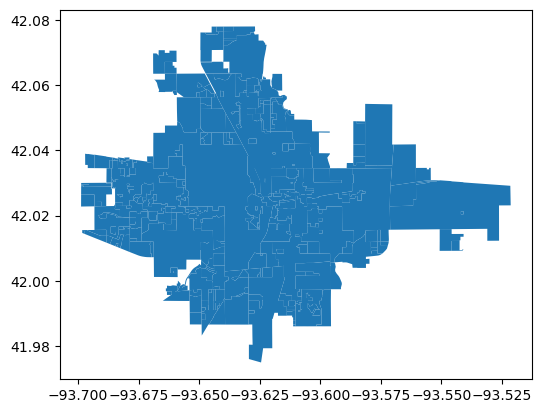

In [149]:
geo = gpd.read_file('Ames_Zoning_Web_Service.geojson', crs='EPSG:4326')
geo.plot()

In [150]:
geo.shape

(287, 10)

In [151]:
geo[geo['OBJECTID']==2139]


,OBJECTID,ZONE_,ZONE_LABEL,ORDINANCE_NO,SUBTYPE,MODIFED_DATE,LEGEND,SHAPESTArea,SHAPESTLength,geometry
192,2139,Government/Airport District,S-GA,NaN,NaN,NaT,NaN,9.295432e+07,83687.695995,"POLYGON ((-93.65746 42.04767, -93.65764 42.047..."


In [152]:
res = []
for r in geo.ZONE_.unique():
    if 'Resid' in r or 'Comm' in r:
        res.append(r)
res

['Suburban Residential Floating Zoning Residential Low Density',
 'Residential Low Density Zone',
 'Community Commercial Node',
 'Planned Regional Commercial Zone',
 'Residential High Density Zone',
 'Neighborhood Commercial Zone',
 'Planned Residence District',
 'Residential Medium Density Zone',
 'Highway-Oriented Commercial Zone',
 'Urban Core Residential Medium Density Zone',
 'Residential Low Density Park Zone',
 'Community Commercial/Residential',
 'Village Residential District',
 'Suburban Residential Floating Zoning Residential Medium Density',
 'Downtown Gateway Commercial Area']

In [153]:
neighborhoods_geo = gpd.sjoin_nearest(geo, nbrhd_points, how='inner')
neighborhoods_geo.rename(columns={'index_right': 'Neighborhood'}, inplace=True)

# a.loc[~a['ZONE_'].isin(res), 'SalePrice'] = 0

c:\Users\Ziad\anaconda3\lib\site-packages\geopandas\array.py:364: UserWarning:

Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




In [154]:
neighborhoods_geo.drop_duplicates(subset='OBJECTID', inplace=True)

In [155]:
neighborhoods_geo.shape

(287, 14)

<Axes: >

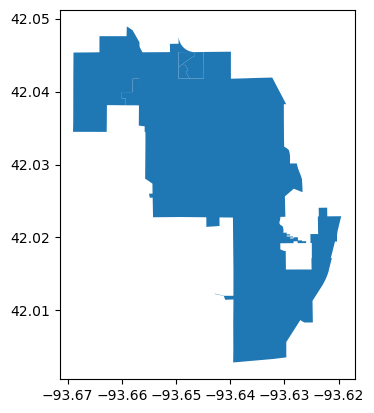

In [156]:
neighborhoods_geo[neighborhoods_geo['Name'] == 'Veenker'].plot()

In [157]:
neighborhoods_geo[['Neighborhood', 'Name', 'geometry']]

,Neighborhood,Name,geometry
0,Blmngtn,Bloomington Heights,"POLYGON ((-93.63105 42.05762, -93.63086 42.057..."
117,Blmngtn,Bloomington Heights,"POLYGON ((-93.63419 42.06351, -93.63518 42.063..."
124,Blmngtn,Bloomington Heights,"POLYGON ((-93.62922 42.06205, -93.62943 42.062..."
145,Blmngtn,Bloomington Heights,"POLYGON ((-93.61073 42.04212, -93.61073 42.042..."
198,Blmngtn,Bloomington Heights,"POLYGON ((-93.63369 42.05512, -93.63376 42.055..."
...,...,...,...
227,StoneBr,Stone Brook,"POLYGON ((-93.64003 42.07655, -93.63597 42.076..."
228,StoneBr,Stone Brook,"POLYGON ((-93.64002 42.07378, -93.64002 42.072..."
233,StoneBr,Stone Brook,"POLYGON ((-93.64003 42.07438, -93.64002 42.073..."
247,StoneBr,Stone Brook,"POLYGON ((-93.64003 42.07633, -93.64003 42.077..."


In [158]:
def make_map(dataframe, var, title, aggr='mean', opacity=0.7, na_opacity=0.3):
    grouped = dataframe.groupby('Neighborhood')[var].aggregate(aggr)
    map = neighborhoods_geo.merge(grouped, on='Neighborhood')
    
    a = map.copy()
    a.loc[~a['ZONE_'].isin(res), var] = 0
    
    a['Opacity'] = opacity
    a.loc[~a['ZONE_'].isin(res), 'Opacity'] = 0.3
    
    print(a.iloc[92])
    
    fig = px.choropleth_mapbox(a,
                            geojson=a.geometry,
                            locations=a.index, 
                            color=var,
                            center={'lat': 42.03000, 'lon': -93.620369},
                            zoom=11.2,
                            opacity=a['Opacity'],
                            hover_data=['Name'],
                            color_continuous_scale='reds',                            
                            )

    fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSTopo/MapServer/tile/{z}/{y}/{x}"
            ]
        }
])

    fig.update_layout(margin={"r":0,"t":80,"l":0,"b":0})
    fig.update_layout(
        title=dict(text=title,x=0.4, y=0.95, xanchor='center', font=dict(size=30, family= 'Times New Roman',color= '#11476E'), )
    )
    
    
    
    return fig

In [159]:
var = 'SalePrice'

fig = make_map(dataframe=train, 
               var=var, 
               aggr='mean', 
               title='<b>Average Sale Price by Neighborhood<br>Ames City, Iowa (US)</b>',
               na_opacity=0.2)


# fig.update_layout(coloraxis_colorbar=dict(
#         title=var,
#         tickvals=[0, 50000, 100000, 150000, 200000, 250000, 300000],
#         ticktext=["None","50K", "100K", "150K", "200K", "250K", "300K"],
#         lenmode="pixels",
#     ))
fig.show()

OBJECTID                                                        50
ZONE_                                            Agricultural Zone
ZONE_LABEL                                                       A
ORDINANCE_NO                                                   NaN
SUBTYPE                                                        NaN
MODIFED_DATE                                                   NaT
LEGEND                                                         NaN
SHAPESTArea                                          107240.536997
SHAPESTLength                                          1516.948066
geometry         POLYGON ((-93.67879907374783 42.0373224623358,...
Neighborhood                                                Sawyer
Name                                                        Sawyer
x                                                       -93.677066
y                                                        42.033903
SalePrice                                                     

In [160]:
grouped = train.groupby('Neighborhood')['SalePrice'].mean()

In [161]:
neighborhoods_geo[neighborhoods_geo['OBJECTID']==2139]

,OBJECTID,ZONE_,ZONE_LABEL,ORDINANCE_NO,SUBTYPE,MODIFED_DATE,LEGEND,SHAPESTArea,SHAPESTLength,geometry,Neighborhood,Name,x,y
192,2139,Government/Airport District,S-GA,NaN,NaN,NaT,NaN,9.295432e+07,83687.695995,"POLYGON ((-93.65746 42.04767, -93.65764 42.047...",Veenker,Veenker,-93.649122,42.04164


In [162]:
map = neighborhoods_geo.merge(grouped, on='Neighborhood', how='inner')

In [163]:
map[map['OBJECTID']==2139]

,OBJECTID,ZONE_,ZONE_LABEL,ORDINANCE_NO,SUBTYPE,MODIFED_DATE,LEGEND,SHAPESTArea,SHAPESTLength,geometry,Neighborhood,Name,x,y,SalePrice
90,2139,Government/Airport District,S-GA,NaN,NaN,NaT,NaN,9.295432e+07,83687.695995,"POLYGON ((-93.65746 42.04767, -93.65764 42.047...",Veenker,Veenker,-93.649122,42.04164,238772.727273


In [164]:
import plotly.graph_objects as go
a = map.copy()
a['Opacity'] = 0.7
a.loc[~a['ZONE_'].isin(res), 'SalePrice'] = 0
a.loc[~a['ZONE_'].isin(res), 'Opacity'] = 0.3

fig = px.choropleth_mapbox(a,
                           geojson=a.geometry,
                           locations=a.index, 
                           color='SalePrice',
                           center={'lat': 42.03000, 'lon': -93.620369},
                           zoom=11.2,
                           opacity=a.Opacity,
                           hover_data=['Name'],
                        #    color_continuous_scale=[(0,'#FFFFFF'),
                        #                            (0.3, '#4488CC'),
                        #                             (0.55, '#AA44AA'),
                        #                            (1, '#FF4444')],
                           # color_continuous_scale=[(0,'#FFFFFF'),
                           #                         (0.3, '#88CCFF'),
                           #                         (0.65, '#4488CC'),
                           #                         (1, '#004488')],
                           color_continuous_scale='reds',
                        #    width=800, height=600,
                           # mapbox_style="open-street-map",
                           mapbox_style="carto-positron",
                        #    mapbox_style="stamen-toner",
                           
                           )

# fig.update_layout(coloraxis_colorbar=dict(
#    title="Sale Price [$]",
#    tickvals=[0, 50000, 100000, 150000, 200000, 250000, 300000],
#    ticktext=["None","50K", "100K", "150K", "200K", "250K", "300K"],
#    lenmode="pixels",
# ))

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(
   title=dict(text='<b>Average Sale Price by Neighborhood<br>Ames City, Iowa (US)</b>',x=0.4, y=0.95, xanchor='center', font=dict(size=30, family= 'Times New Roman',color= '#11476E'), )
)
fig.show()

In [165]:
a.iloc[92]

OBJECTID                                                        50
ZONE_                                            Agricultural Zone
ZONE_LABEL                                                       A
ORDINANCE_NO                                                   NaN
SUBTYPE                                                        NaN
MODIFED_DATE                                                   NaT
LEGEND                                                         NaN
SHAPESTArea                                          107240.536997
SHAPESTLength                                          1516.948066
geometry         POLYGON ((-93.67879907374783 42.0373224623358,...
Neighborhood                                                Sawyer
Name                                                        Sawyer
x                                                       -93.677066
y                                                        42.033903
SalePrice                                                     

In [166]:
a[a['OBJECTID']==2139]

,OBJECTID,ZONE_,ZONE_LABEL,ORDINANCE_NO,SUBTYPE,MODIFED_DATE,LEGEND,SHAPESTArea,SHAPESTLength,geometry,Neighborhood,Name,x,y,SalePrice,Opacity
90,2139,Government/Airport District,S-GA,NaN,NaN,NaT,NaN,9.295432e+07,83687.695995,"POLYGON ((-93.65746 42.04767, -93.65764 42.047...",Veenker,Veenker,-93.649122,42.04164,0.0,0.3
